A list of features:
['alison', 'book', 'like', 'love', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport']

Tf-idf-weighted document-term matrix:
     alison      book      like      love     natur      past     polit  \
0  0.000000  0.000000  0.504883  0.000000  0.000000  0.404050  0.341127   
1  0.000000  0.000000  0.287314  0.000000  0.000000  0.000000  0.776500   
2  0.000000  0.618987  0.229032  0.000000  0.000000  0.366582  0.309494   
3  0.000000  0.623322  0.000000  0.369149  0.369149  0.000000  0.000000   
4  0.000000  0.372923  0.551943  0.000000  0.000000  0.000000  0.000000   
5  0.442639  0.000000  0.226776  0.362970  0.725940  0.000000  0.000000   

       read    robert       sam      sara     sport  
0  0.000000  0.000000  0.000000  0.000000  0.682253  
1  0.000000  0.000000  0.560802  0.000000  0.000000  
2  0.366582  0.000000  0.000000  0.447043  0.000000  
3  0.369149  0.450174  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000 

C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The elbow value for k is: 4


C:\Users\Ryan\AppData\Local\Temp/ipykernel_22032/3570228559.py:79: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
C:\Users\Ryan\AppData\Local\Temp/ipykernel_22032/3570228559.py:80: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')


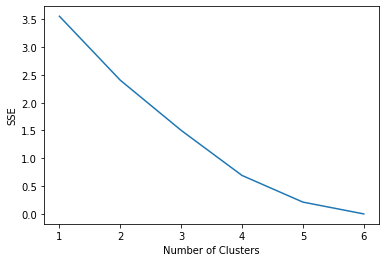

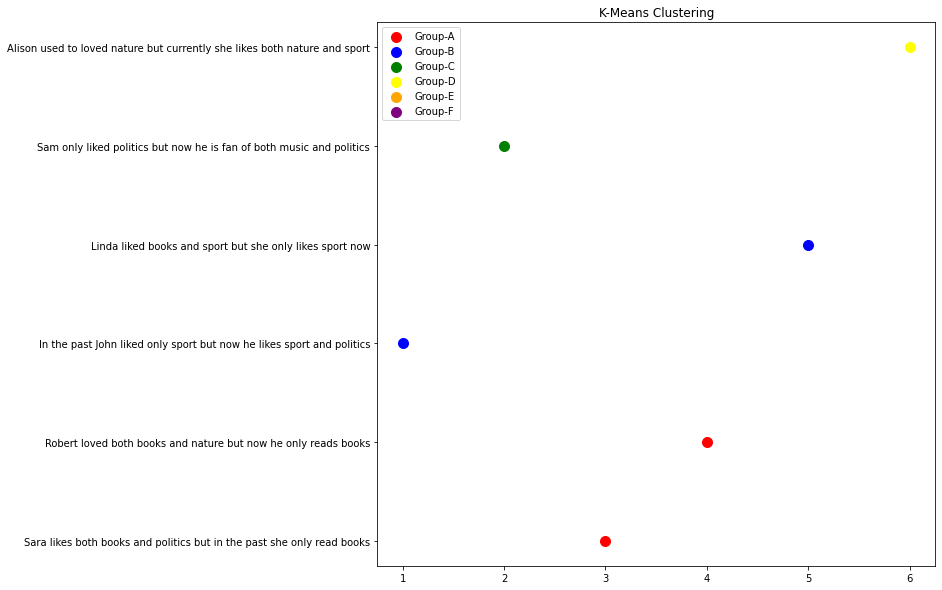

In [1]:
# TF-IDF Implementation
# To find the knee in the scenario, we used a convex and decreasing model

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from kneed import KneeLocator

dp = pd.read_csv("nlp-dataset.csv")
corpus = np.array(dp['text'])

for i in range(len(corpus)):
    words = word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    corpus[i] = ' '.join(words) 
    
v = TfidfVectorizer(stop_words='english', max_features=12)
tfidf = v.fit_transform(corpus)

print("A list of features:")
print("===================")
print(v.get_feature_names())
print()

print("Tf-idf-weighted document-term matrix:")
print("====================================")
dp = pd.DataFrame(tfidf.toarray(), columns=v.get_feature_names())
print(dp)
print()

print("Cosine Similarity:")
print("====================================")
print(cosine_similarity(dp,dp))
print()

SSE = []
numClusters = [1,2,3,4,5,6]

for k in numClusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    #y_kmeans = kmeans.fit(tfidf)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


kl = KneeLocator(range(1,7), SSE, curve='convex', direction='decreasing')
print("The elbow value for k is:", kl.elbow)

nlp = pd.read_csv("nlp-dataset.csv")
df = pd.DataFrame(nlp)
X = df.iloc[:,:].values
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeansfit = kmeans.fit(tfidf)
y_kmeans = kmeans.fit_predict(tfidf)
df['Cluster'] = y_kmeans

plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Group-A')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Group-B')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Group-C')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='yellow', label='Group-D')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')

plt.title("K-Means Clustering")
plt.legend()
plt.show()

A list of features:
['alison', 'book', 'like', 'love', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport']

Weighted document-term matrix:
     alison      book      like      love     natur      past     polit  \
0  0.000000  0.000000  0.632456  0.000000  0.000000  0.316228  0.316228   
1  0.000000  0.000000  0.408248  0.000000  0.000000  0.000000  0.816497   
2  0.000000  0.666667  0.333333  0.000000  0.000000  0.333333  0.333333   
3  0.000000  0.707107  0.000000  0.353553  0.353553  0.000000  0.000000   
4  0.000000  0.333333  0.666667  0.000000  0.000000  0.000000  0.000000   
5  0.353553  0.000000  0.353553  0.353553  0.707107  0.000000  0.000000   

       read    robert       sam      sara     sport  
0  0.000000  0.000000  0.000000  0.000000  0.632456  
1  0.000000  0.000000  0.408248  0.000000  0.000000  
2  0.333333  0.000000  0.000000  0.333333  0.000000  
3  0.353553  0.353553  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  0.6666

C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ryan\AppData\Local\Temp/ipykernel_22032/1745914478.py:79: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
C:\Users\Ryan\AppData\Local\Temp/ipykernel_22032/1745914478.py:80: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')


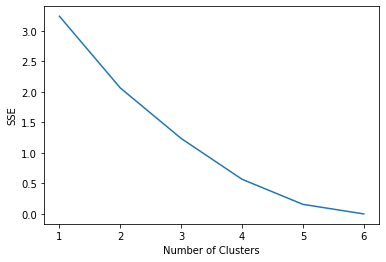

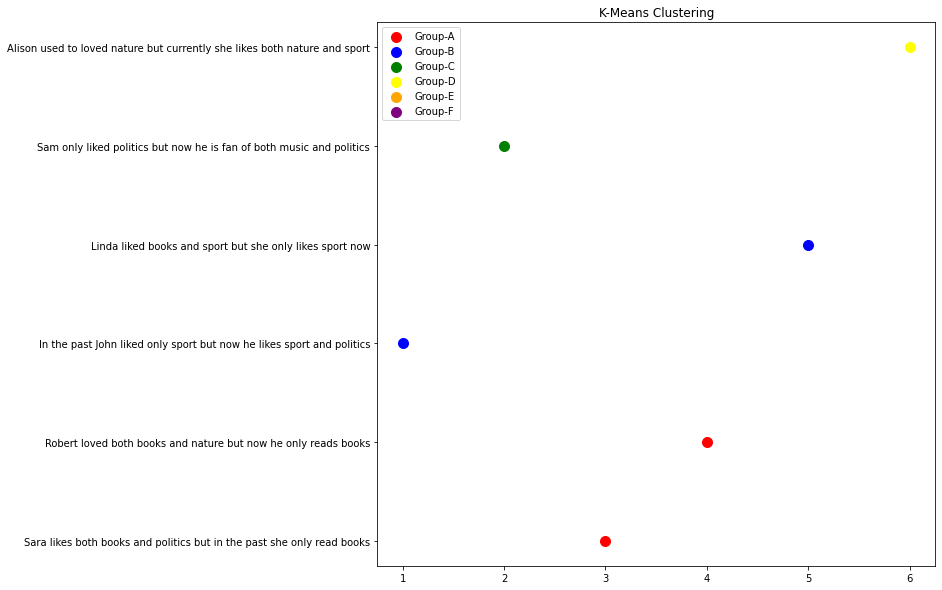

In [2]:
# TF Implementation
# To find the knee in the scenario, we used a convex and decreasing model

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from kneed import KneeLocator

dp = pd.read_csv("nlp-dataset.csv")
corpus = np.array(dp['text'])

for i in range(len(corpus)):
    words = word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    corpus[i] = ' '.join(words) 
    
v = TfidfVectorizer(use_idf=False, stop_words='english', max_features=12)
tfidf = v.fit_transform(corpus)

print("A list of features:")
print("===================")
print(v.get_feature_names())
print()

print("Weighted document-term matrix:")
print("====================================")
dp = pd.DataFrame(tfidf.toarray(), columns=v.get_feature_names())
print(dp)
print()

print("Cosine Similarity:")
print("====================================")
print(cosine_similarity(dp,dp))
print()

SSE = []
numClusters = [1,2,3,4,5,6]

for k in numClusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    #y_kmeans = kmeans.fit(tfidf)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


kl = KneeLocator(range(1,7), SSE, curve='convex', direction='decreasing')
print("The elbow value for k is:", kl.elbow)

nlp = pd.read_csv("nlp-dataset.csv")
df = pd.DataFrame(nlp)
X = df.iloc[:,:].values
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeansfit = kmeans.fit(tfidf)
y_kmeans = kmeans.fit_predict(tfidf)
df['Cluster'] = y_kmeans

plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Group-A')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Group-B')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Group-C')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='yellow', label='Group-D')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')

plt.title("K-Means Clustering")
plt.legend()
plt.show()

C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


A list of features:
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Weighted document-term matrix:
   alison  book  current  fan  john  like  linda  love  music  natur  past  \
0       0     0        0    0     1     2      0     0      0      0     1   
1       0     0        0    1     0     1      0     0      1      0     0   
2       0     2        0    0     0     1      0     0      0      0     1   
3       0     2        0    0     0     0      0     1      0      1     0   
4       0     1        0    0     0     2      1     0      0      0     0   
5       1     0        1    0     0     1      0     1      0      2     0   

   polit  read  robert  sam  sara  sport  use  
0      1     0       0    0     0      2    0  
1      2     0       0    1     0      0    0  
2      1     1       0    0     1      0    0  
3      0     1       1    0     0      0    0  
4      

C:\Users\Ryan\AppData\Local\Temp/ipykernel_22032/970940726.py:82: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
C:\Users\Ryan\AppData\Local\Temp/ipykernel_22032/970940726.py:83: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')


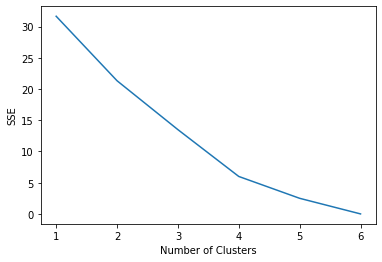

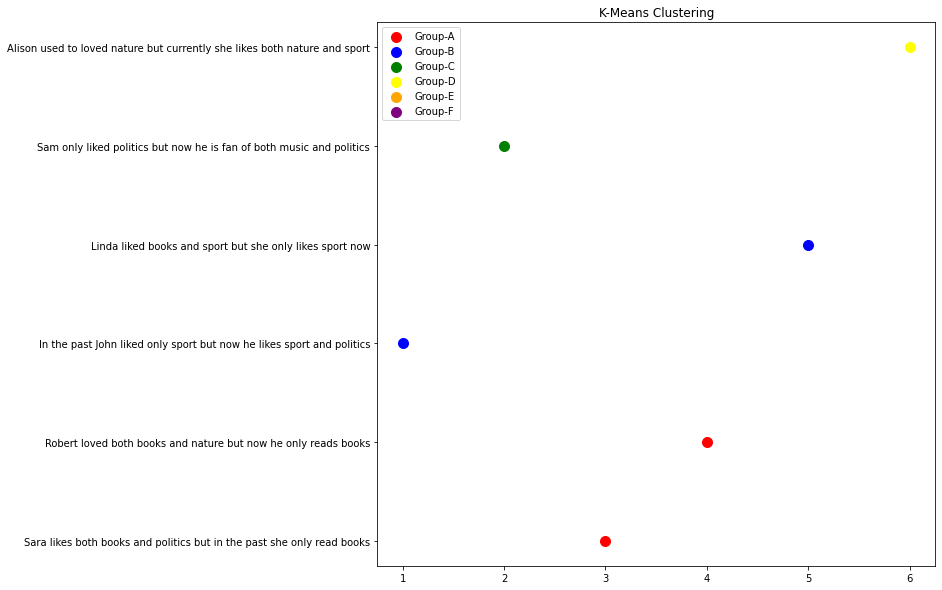

In [3]:
# Bag of Words Implementation
# To find the knee in the scenario, we used a concave and decreasing model

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from kneed import KneeLocator

dp = pd.read_csv("nlp-dataset.csv")
corpus = np.array(dp['text'])

for i in range(len(corpus)):
    words = word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    corpus[i] = ' '.join(words) 
    
v = CountVectorizer(lowercase=True, stop_words='english')
bag = v.fit_transform(corpus)

df_bow_sklearn = pd.DataFrame(bag.toarray(),columns=v.get_feature_names())
#print(df_bow_sklearn.head())

print("A list of features:")
print("===================")
print(v.get_feature_names())
print()

print("Weighted document-term matrix:")
print("====================================")
dp = pd.DataFrame(bag.toarray(), columns=v.get_feature_names())
print(dp)
print()

print("Cosine Similarity:")
print("====================================")
print(cosine_similarity(dp,dp))
print()

SSE = []
numClusters = [1,2,3,4,5,6]

for k in numClusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    #y_kmeans = kmeans.fit(tfidf)
    kmeans.fit(bag)
    SSE.append(kmeans.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


kl = KneeLocator(range(1,7), SSE, curve='convex', direction='decreasing')
print("The elbow value for k is:", kl.elbow)

nlp = pd.read_csv("nlp-dataset.csv")
df = pd.DataFrame(nlp)
X = df.iloc[:,:].values
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeansfit = kmeans.fit(tfidf)
y_kmeans = kmeans.fit_predict(tfidf)
df['Cluster'] = y_kmeans

plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Group-A')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Group-B')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Group-C')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='yellow', label='Group-D')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')

plt.title("K-Means Clustering")
plt.legend()
plt.show()

A list of features:
['like', 'sport', 'book', 'polit', 'natur', 'past', 'love', 'read', 'fan', 'john', 'sam', 'current', 'music', 'use', 'robert', 'linda', 'alison', 'sara']

The elbow value for k is: None


C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\kneed\knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


ValueError: Length of values (18) does not match length of index (6)

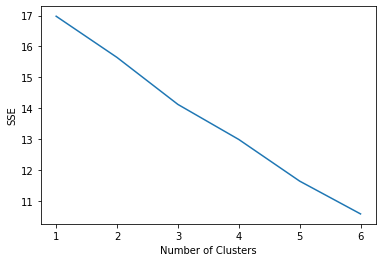

In [4]:
# Word2Doc Implementation
# To find the knee in the scenario, we used a concave and decreasing model

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from kneed import KneeLocator
import gensim
from gensim.models import Word2Vec
import numpy as np 

sentences = [
    'In the past John liked only sport but now he likes sport and politics',
    'Sam only liked politics but now he is fan of both music and politics',
    'Sara likes both books and politics but in the past she only read books',
    'Robert loved both books and nature but now he only reads books',
    'Linda liked books and sport but she only likes sport now',
    'Alison used to loved nature but currently she likes both nature and sport'
]

corpus = []

for sentence in sentences:
    sentence = sentence.lower()
    words = word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    #sentence = ' '.join(words)
    #word2vec needs list of lists
    corpus.append(words)

# Create CBOW model
v = gensim.models.Word2Vec(corpus, min_count = 1, window = 5)
bag = v.wv.get_normed_vectors()

words = list(w for w in v.wv.key_to_index)
print("A list of features:")
print("===================")
print(words)
print()

SSE = []
numClusters = [1,2,3,4,5,6]
num = range(1,7)

for k in numClusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    #y_kmeans = kmeans.fit(bag)
    kmeans.fit(bag)
    SSE.append(kmeans.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


kl = KneeLocator(range(1,7), SSE, curve='convex', direction='decreasing')
print("The elbow value for k is:", kl.elbow)

nlp = pd.read_csv("nlp-dataset.csv")
df = pd.DataFrame(nlp)
X = df.iloc[:,:].values
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeansfit = kmeans.fit(bag)
y_kmeans = kmeans.fit_predict(bag)
df['Cluster'] = y_kmeans

plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Group-A')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Group-B')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Group-C')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='yellow', label='Group-D')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange', label='Group-E')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='purple', label='Group-F')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='maroon', label='Group-G')

plt.title("K-Means Clustering")
plt.legend()
plt.show()
